In [1]:
#IMPORTING THE PACKAGES REQUIRED 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Load the dataset into the Python environment
data=pd.read_csv(r"C:\Users\user\Downloads\titanic_dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Make ‘PassengerId’ as the index column
data=data.set_index('PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#. Check the basic details of the dataset
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
data.shape

(891, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

INSIGHTS:

The dataset consists of 891 rows and 12 columns. There are 4 integer valued columns, 5 object valued columns and two floating valued columns.The three colums , namely, 'Age','Cabin' and 'Embarked' have missing values.(177,687 and 2 respectively).

Now, in the previous steps, 'PassengerId' was turned into the index column. The column 'Survived' is the indicator on whether the passenger survived (0 = No, 1 = Yes) the accident. 'Pclass' indicates the ticket class of the passenger (1 = 1st, 2 = 2nd, 3 = 3rd). 'SibSp' denotes the number of passenger's with siblings or spouses aboard the Titanic. 'Parch' denotes the number of passenger's parents or children on the Titanic. 'Fare' consists the amount passenger paid to board the ship. The column 'Cabin' denotes the number and the port of embarkation i.e,'Embarked' (C = Cherbourg, Q = Queenstown, S = Southampton). Some categorical values such as data in the columns 'Survived', 'Pclass' are represented by numbers while others such as 'Sex' and 'Embarked' are represented by text . And then we see textual data in the columns 'Name', 'Ticket', and 'Cabin'.


In [11]:
freq_graph=data.select_dtypes(include=['float','object','int'])

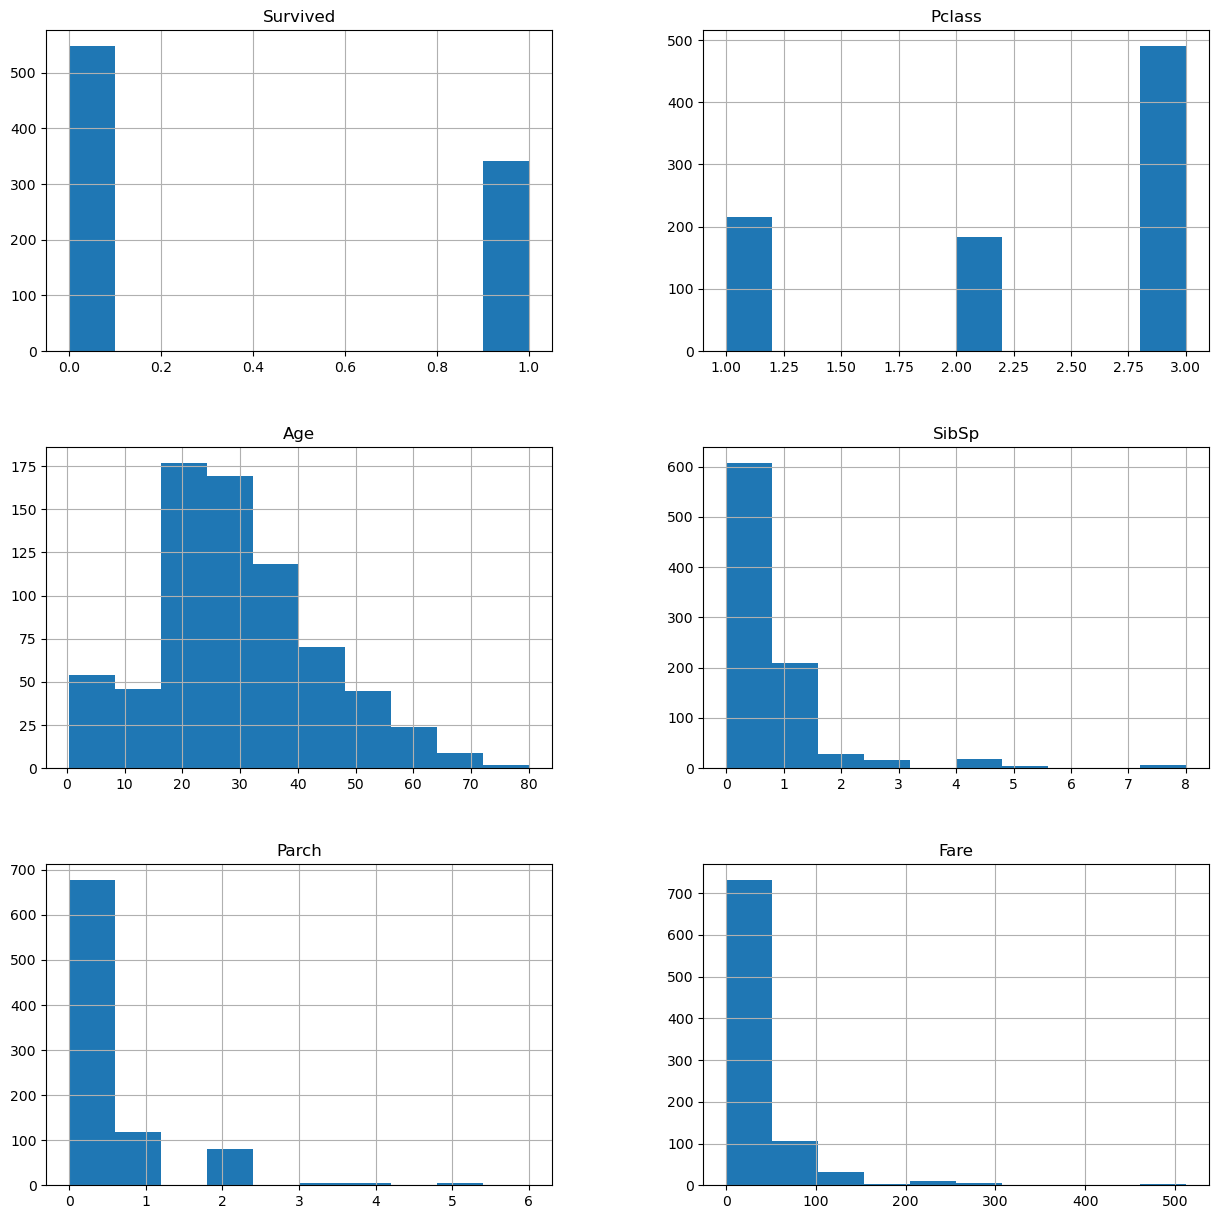

In [12]:
freq_graph.hist(figsize=(15,15));

In [13]:
#The missing values in the column 'Age' and 'Embarked' are filled with the mean and mode respectively;
#while the column 'Cabin' has its unmarked values filled with the word 'Undefined'.
data['Age'].fillna(round(data['Age'].median(),1),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data["Cabin"].fillna(value='Undefined',inplace=True)

In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [15]:
#Check and handle outliers in at least 3 columns in the dataset
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
columns = ['Age', 'SibSp','Fare']

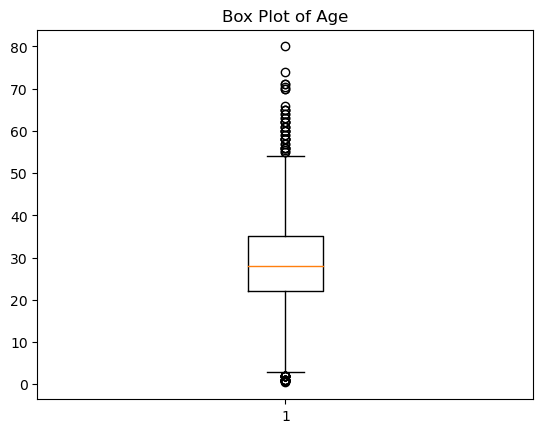

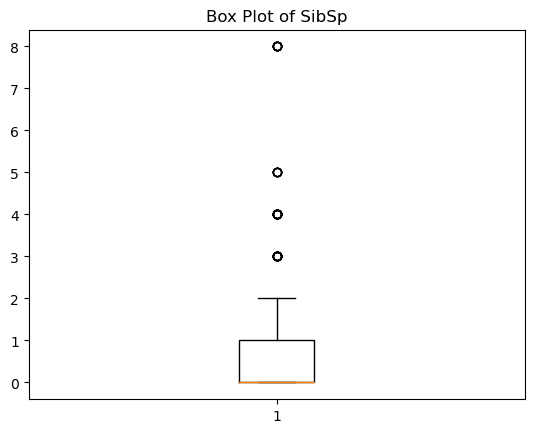

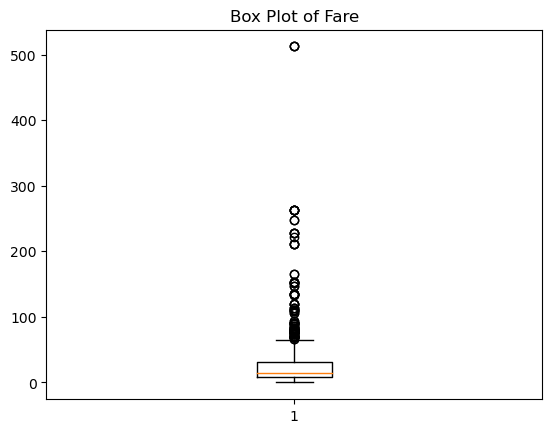

In [17]:
for col in columns:
    plt.figure()
    plt.boxplot(data[col]);
    plt.title("Box Plot of "+col)
    plt.show()

In [18]:
#Outlier handling Of 'Age'
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
lowlim=Q1-1.5*IQR
uprlim=Q3+1.5*IQR
print('LOWER LIMIT:',+lowlim)
print('UPPER LIMIT:',+uprlim)

LOWER LIMIT: 2.5
UPPER LIMIT: 54.5


In [19]:
outlier=[]
for x in data['Age']:
    if((x>uprlim) or (x<lowlim)):
        outlier.append(x)
data['Age']=np.where(data['Age']>uprlim,uprlim,np.where(data['Age']<lowlim,lowlim,data['Age']))

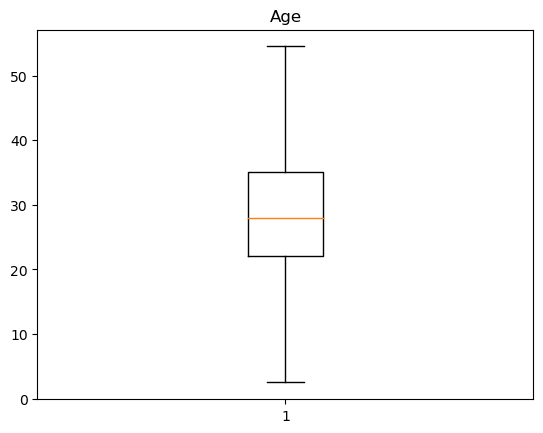

In [20]:
plt.boxplot(data['Age'])
plt.title('Age')
plt.show()

In [21]:
#Outlier handling Of 'SibSp'
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
lowlim=Q1-1.5*IQR
uprlim=Q3+1.5*IQR
print('LOWER LIMIT:',+lowlim)
print('UPPER LIMIT:',+uprlim)

LOWER LIMIT: -1.5
UPPER LIMIT: 2.5


In [22]:
outlier=[]
for x in data['SibSp']:
    if((x>uprlim) or (x<lowlim)):
        outlier.append(x)
data['SibSp']=np.where(data['SibSp']>uprlim,uprlim,np.where(data['SibSp']<lowlim,lowlim,data['SibSp']))

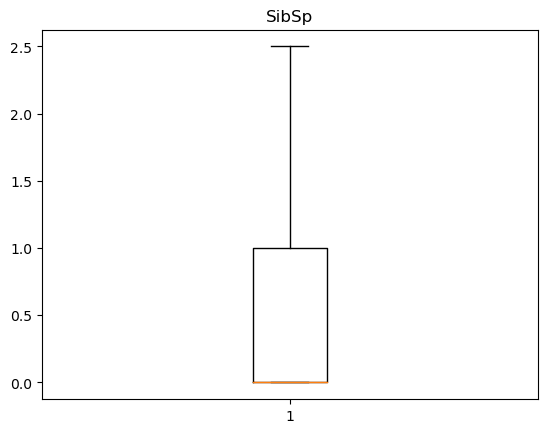

In [23]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')
plt.show()

In [24]:
#Outlier handling Of Fare
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
lowlim=Q1-1.5*IQR
uprlim=Q3+1.5*IQR
print('LOWER LIMIT:',+lowlim)
print('UPPER LIMIT:',+uprlim)

LOWER LIMIT: -26.724
UPPER LIMIT: 65.6344


In [25]:
outlier=[]
for x in data['Fare']:
    if((x>uprlim) or (x<lowlim)):
        outlier.append(x)
data['Fare']=np.where(data['Fare']>uprlim,uprlim,np.where(data['Fare']<lowlim,lowlim,data['Fare']))

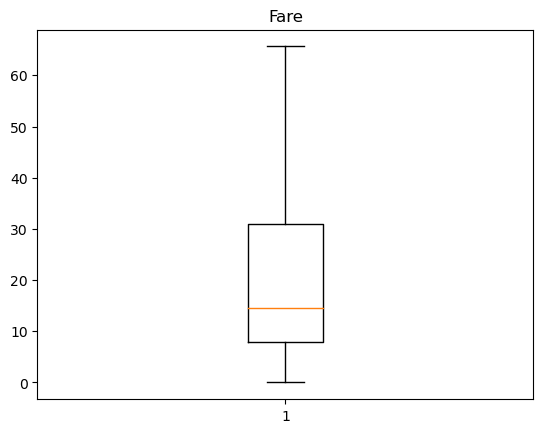

In [26]:
plt.boxplot(data['Fare'])
plt.title('Fare')
plt.show()

In [27]:
#min max scaling on the feature set by taking ‘Survived’ as the target.
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(data[col])
   
    data[col] = le.transform(data[col])
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0,A/5 21171,7.2500,Undefined,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0,PC 17599,65.6344,C85,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0,STON/O2. 3101282,7.9250,Undefined,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0,113803,53.1000,C123,2
5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0,373450,8.0500,Undefined,2


In [28]:
x= data[['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked']]

In [29]:
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    le.fit(x[col])
    x[col] = le.transform(x[col])
    
    
             
            
x.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12808\3805349821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = le.transform(x[col])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1.0,0,7.2500,2
2,1,0,38.0,1.0,0,65.6344,0
3,3,0,26.0,0.0,0,7.9250,2
4,1,0,35.0,1.0,0,53.1000,2
5,3,1,35.0,0.0,0,8.0500,2


In [30]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [31]:
x =pd.DataFrame(x,columns=['Pclass','Sex', 'Age', 'SibSp','Parch','Fare','Embarked'])

In [32]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.647587,0.510371,0.170595,0.063599,0.366375,0.768238
std,0.418036,0.477990,0.232155,0.283298,0.134343,0.312056,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.375000,0.000000,0.000000,0.120522,0.500000
50%,1.000000,1.000000,0.490385,0.000000,0.000000,0.220223,1.000000
75%,1.000000,1.000000,0.625000,0.400000,0.000000,0.472313,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.375000,0.4,0.0,0.110460,1.0
1,0.0,0.0,0.682692,0.4,0.0,1.000000,0.0
2,1.0,0.0,0.451923,0.0,0.0,0.120745,1.0
3,0.0,0.0,0.625000,0.4,0.0,0.809027,1.0
4,1.0,1.0,0.625000,0.0,0.0,0.122649,1.0
